# Huligutta (Goats and Tigers) Data Visualization

In [72]:
import numpy as np
import sys
sys.path.append("..")
from huligutta import *
from functions import *
from itertools import combinations
from copy import deepcopy
import networkx as nx
from networkx.algorithms import bipartite
import random
import matplotlib.pyplot as plt

# Computing stalemate positions from all the possible tiger positions. 
This is to see at how many goats positions does we need in order to increase the changes of goats winning.
The lower the number of stalemate positions, the less worry that tigers will lose.
Note that there are ${23 \choose 3}=1771$ possible positions.

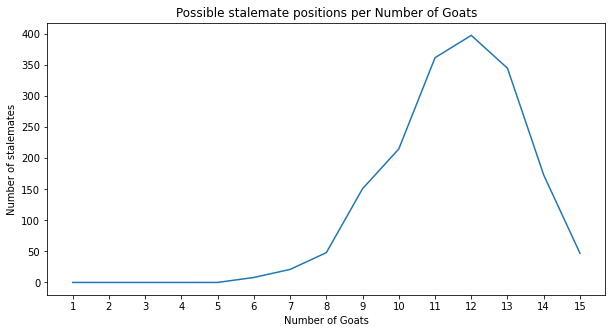

In [73]:
possible_pos = ['a1','a2','a3','b0','b1','b2','b3','b4','c1','c2','c3','c4','d1','d2','d3','d4','e1','e2','e3','e4','f1','f2','f3']
possibleStalemates = []
Goats = []
num_goats = list(range(1,15+1))
for combo in combinations(possible_pos,3):
    goats, position = deepcopy(stalemate(combo[0],combo[1],combo[2]))
    if goats >15:
        continue
    Goats.append(goats)
    possibleStalemates.append(position)
for i in range(len(num_goats)):
    stalemates = [Goats.count(num_goats[i]) for i in range(len(num_goats))]
plt.figure(figsize=(10,5))
plt.plot(num_goats,stalemates)
plt.xticks(num_goats)
plt.xlabel("Number of Goats")
plt.ylabel("Number of stalemates")
plt.title("Possible stalemate positions per Number of Goats")
plt.show()

# Bipartite Graph Representation
Bipartite graph is used to calculate the edit distance from a board position to another. 
On this project, we calculate the edit distance from a board position to its stalemate position.
The edit distance is a data parameter to use for the Reinforcement Learning algorithm.

In the figure below, the nodes represent board positions.

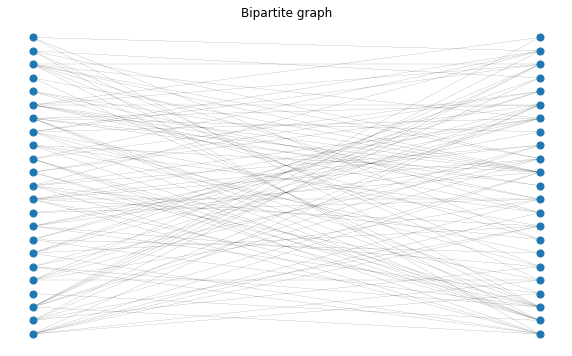

In [74]:
plt.figure(figsize=(10,6))
plt.title("Bipartite graph")
G = nx.bipartite.gnmk_random_graph(23, 23, 22*5, seed=123)
top = nx.bipartite.sets(G)[0]
pos = nx.bipartite_layout(G, top)
nx.draw(G,pos,node_size=50,width=.1)